In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Coloured Images
colour_images={"Nature" :'nature.jpeg',"Cat" :'cat.jpeg',"Image" :'image.jpeg'}

In [3]:
#plotting the graphs 
def disp_graph(S):
    print(" Graphs :")
    plt.figure(1)
    plt.semilogy(np.diag(S))
    plt.title("Singular Values")
    plt.show()
    plt.figure(2)
    plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
    plt.title("Singular Values: Cumulative Sum")
    plt.show()
    

In [4]:
#Compressing a grayscale image

def compress_grayscale(image_path):
    A = imread(image_path) #A is the data matrix
    print("The coloured Image :")
    plt.imshow(A) #display image
    
    width, height, channel = A.shape #channel is 3 for the threee primary colors Red, Blue, Green.
    print("Width :", width)
    print("Height :", height)
    print("Channels :", channel)
    print("Number of pixels :", width * height * channel)
    plt.show() #goes with imshow

#Converting RBG to grayscale image

    X = np.mean(A,-1) #flattening image to grey scale = avg( val(Red), val(blue), val(green))
    print("Grayscale Image :")
    
    width,height=X.shape
    
    print("Width :", width)
    print("Height :", height)
    print("Number of pixels :", width * height)
    
    image = plt.imshow(X)
    image.set_cmap('gray') #setting to greyscale
    plt.axis('off')
    plt.show()
    U, S, V = np.linalg.svd(X, full_matrices=False) #invoking SVD principle; X is mxn (2D)
    S = np.diag(S)
    j = 0;
    for k in (5, 20, 25, 40, 100):
        approx_img = U[:,:k] @ S[0:k,:k] @ V[:k,:] #choose only first k columns = k singular values mxk from mxn
        plt.figure(j+1) 
        j+=1
        c_image = plt.imshow(approx_img)
        c_image.set_cmap('gray')
        plt.title("For k value :"+str(k))
        print("For k value :"+str(k))
        pixel = k*(width+height+1) #k*(m+n+1) #columns, #singular values, #values of s
        #k value should be less than rank of the data matrix, rank is the number of non-zero singular values
        print("Number of pixels ",pixel)
        print("Compression Ratio :",round((width*height)/pixel,2)) #width*height*1 = no. of pixels for original image
        plt.axis('off')
        
        plt.show()
    disp_graph(S)

The coloured Image  :
Width : 179
Height : 282
Channels : 3
Number of pixels : 151434


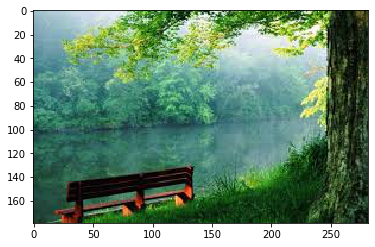

Grayscale Image :
Width : 179
Height : 282
Number of pixels : 50478


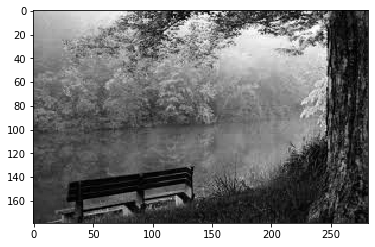

For k value :5
Number of pixels  2310
Compression Ratio : 21.85


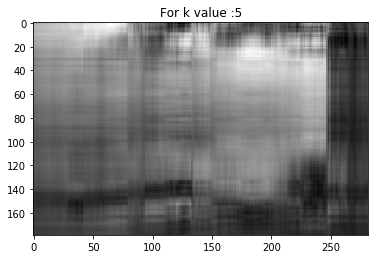

For k value :20
Number of pixels  9240
Compression Ratio : 5.46


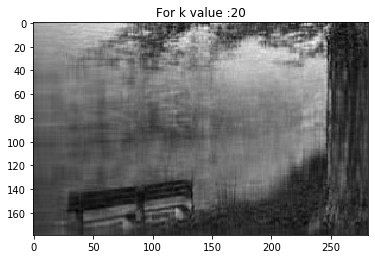

For k value :25
Number of pixels  11550
Compression Ratio : 4.37


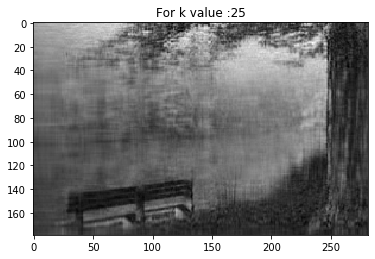

For k value :40
Number of pixels  18480
Compression Ratio : 2.73


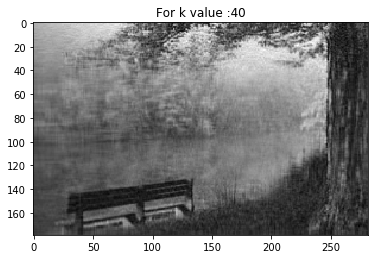

For k value :100
Number of pixels  46200
Compression Ratio : 1.09


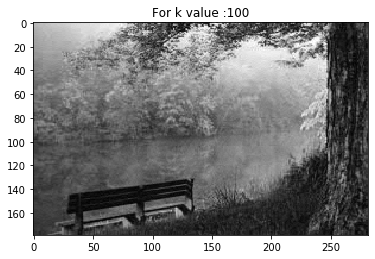

 Graphs :


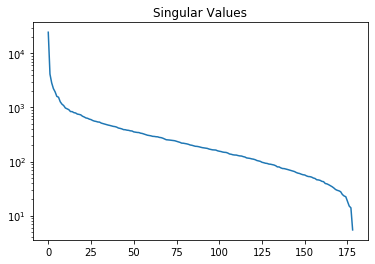

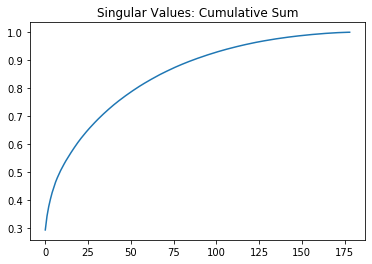

The coloured Image  :
Width : 768
Height : 1024
Channels : 3
Number of pixels : 2359296


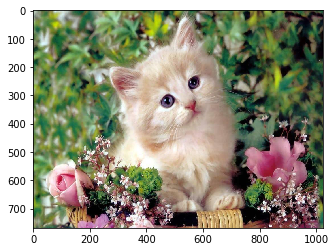

Grayscale Image :
Width : 768
Height : 1024
Number of pixels : 786432


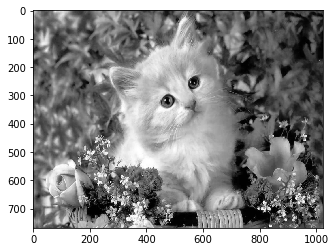

For k value :5
Number of pixels  8965
Compression Ratio : 87.72


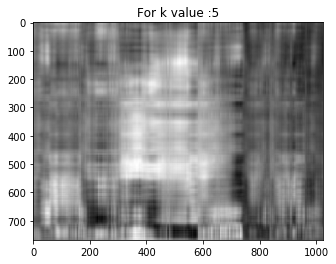

For k value :20
Number of pixels  35860
Compression Ratio : 21.93


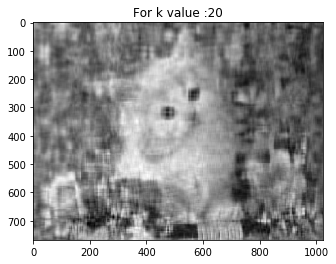

For k value :25
Number of pixels  44825
Compression Ratio : 17.54


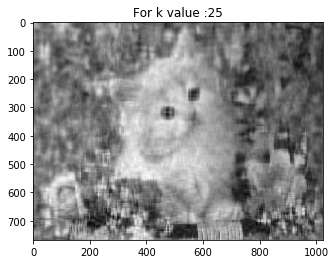

For k value :40
Number of pixels  71720
Compression Ratio : 10.97


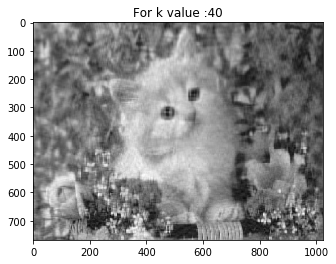

For k value :100
Number of pixels  179300
Compression Ratio : 4.39


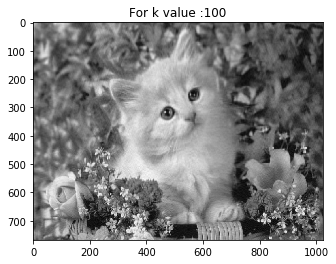

 Graphs :


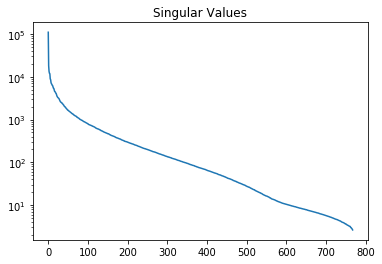

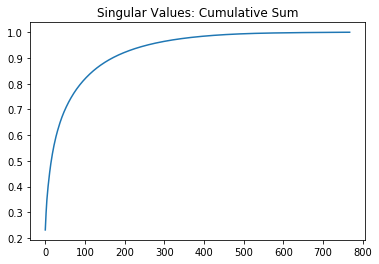

The coloured Image  :
Width : 184
Height : 274
Channels : 3
Number of pixels : 151248


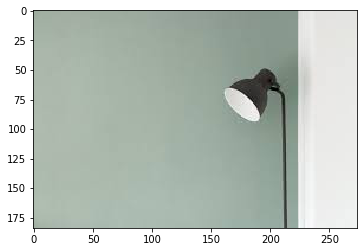

Grayscale Image :
Width : 184
Height : 274
Number of pixels : 50416


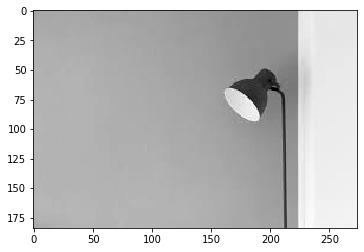

For k value :5
Number of pixels  2295
Compression Ratio : 21.97


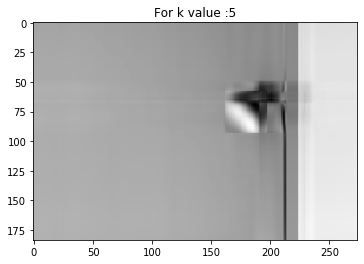

For k value :20
Number of pixels  9180
Compression Ratio : 5.49


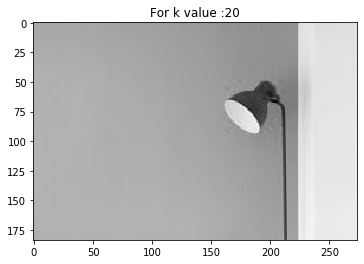

For k value :25
Number of pixels  11475
Compression Ratio : 4.39


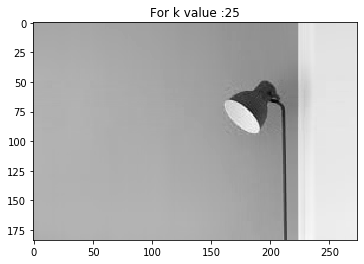

For k value :40
Number of pixels  18360
Compression Ratio : 2.75


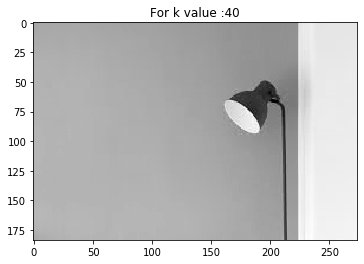

For k value :100
Number of pixels  45900
Compression Ratio : 1.1


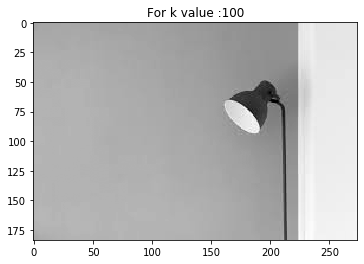

 Graphs :


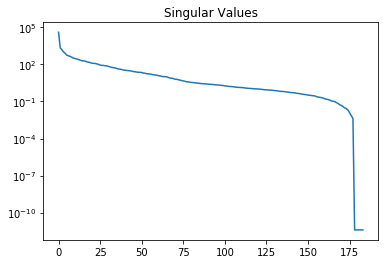

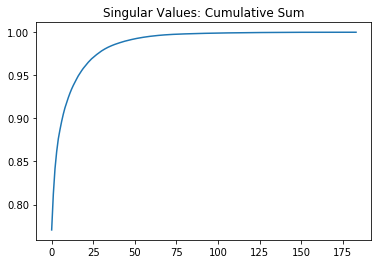

In [5]:
for img in colour_images:
    compress_grayscale(colour_images[img]) #user-defined function
    

In [6]:
# It is evident from the above graphs that a lot of energy is captured in the first few modes.Thus it is sufficient if we retain the first few singular values (till k)


In [7]:
#Compressing a coloured Image
def compress_svd(image,k):
    U,S,V=np.linalg.svd(image,full_matrices=False)
    recon_matrix=np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:])) #reconstructing matrix #c changes for U and #r for V
    return recon_matrix,S

In [8]:
def compress_coloured_image(image_path):
    image=imread(image_path)
    print("Original Image :")
    w,h,c=image.shape
    print("Number of pixels:",w*h*c)
    plt.imshow(image)
    plt.show()
    original_shape=image.shape #returns m, n, c
    for k in (5,20,25,40,100):
        image_layers=[compress_svd(image[:,:,i],k)[0] for i in range(3)] #comressing individually
        image_reconst=np.zeros(image.shape) #fill entire matrix with 0, get size of new image, which will be same as original image
        for i in range(3):
            image_reconst[:,:,i]=image_layers[i] #compresses green into one layer, blue into another, and red into a third and then uses these threee layers to create the final compressed image
        pixel=k*(h+w+1)*3 #colored and not greyscale
        print("For k value :",str(k))
        print("Number of pixels :",pixel)
        print("Compression Ratio :",round((w*h*3)/pixel,2))
        image_reconst=np.array(image_reconst,np.int32)
        plt.imshow(image_reconst)
        plt.title("For k value :"+str(k))
        plt.show()

Original Image :
Number of pixels: 151434


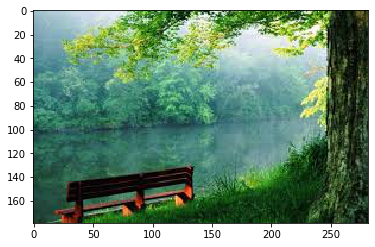

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 5
Number of pixels : 6930
Compression Ratio : 21.85


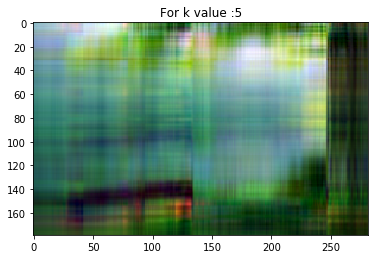

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 20
Number of pixels : 27720
Compression Ratio : 5.46


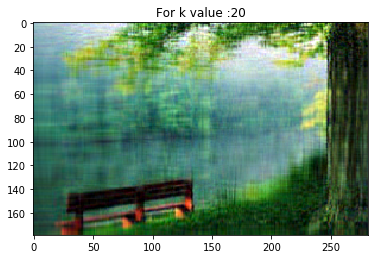

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 25
Number of pixels : 34650
Compression Ratio : 4.37


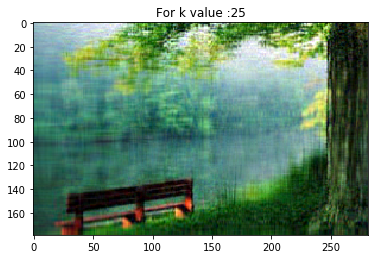

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 40
Number of pixels : 55440
Compression Ratio : 2.73


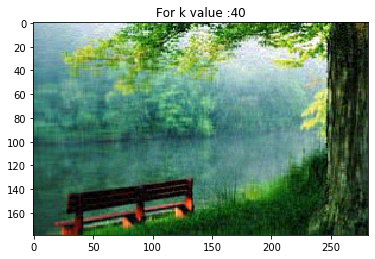

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 100
Number of pixels : 138600
Compression Ratio : 1.09


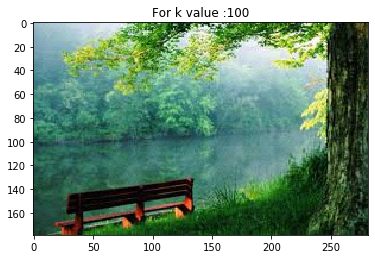

Original Image :
Number of pixels: 2359296


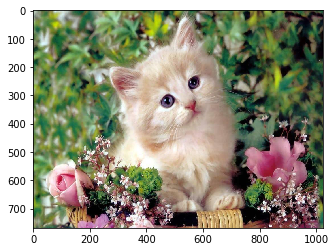

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 5
Number of pixels : 26895
Compression Ratio : 87.72


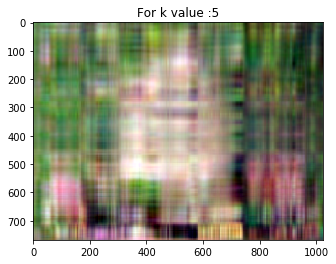

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 20
Number of pixels : 107580
Compression Ratio : 21.93


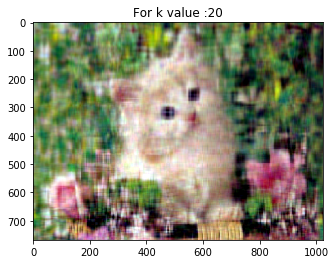

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 25
Number of pixels : 134475
Compression Ratio : 17.54


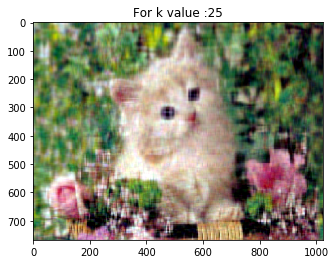

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 40
Number of pixels : 215160
Compression Ratio : 10.97


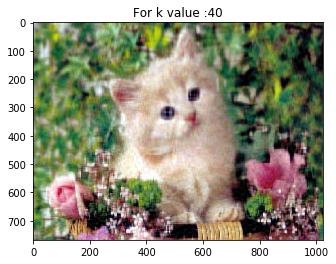

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 100
Number of pixels : 537900
Compression Ratio : 4.39


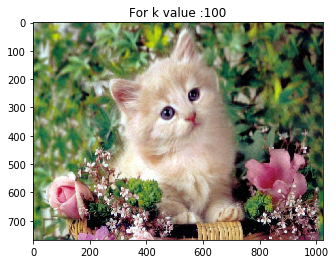

Original Image :
Number of pixels: 151248


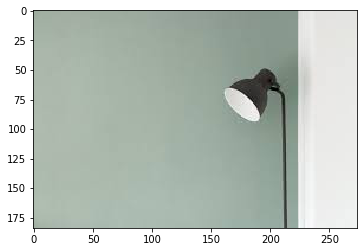

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 5
Number of pixels : 6885
Compression Ratio : 21.97


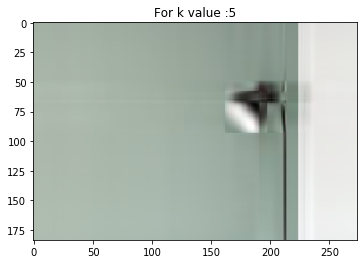

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 20
Number of pixels : 27540
Compression Ratio : 5.49


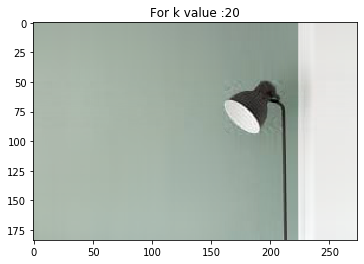

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 25
Number of pixels : 34425
Compression Ratio : 4.39


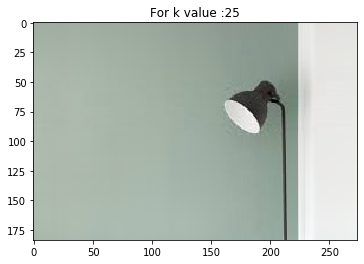

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For k value : 40
Number of pixels : 55080
Compression Ratio : 2.75


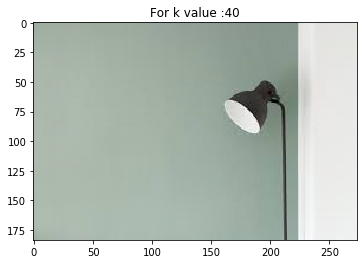

For k value : 100
Number of pixels : 137700
Compression Ratio : 1.1


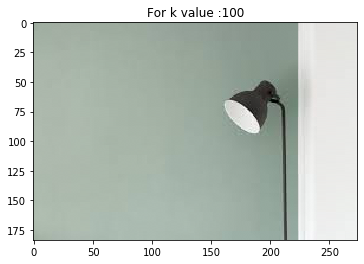

In [9]:
for img in colour_images:
    compress_coloured_image(colour_images[img])

In [ ]:
#Q - Why from k=5 to k=20 CR decreases by 16 (21-5) but for k=20 to k = 60 CR only decreases by 3.
#A - Singular values are arranged in decreasing order, so largest values are in the left most columns, thus for smaller k values. They hold the most information in their cells. So graph is exponential 